In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(39)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "linear"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Linear regression (Normal equation)

Saving figure generated_data_plot


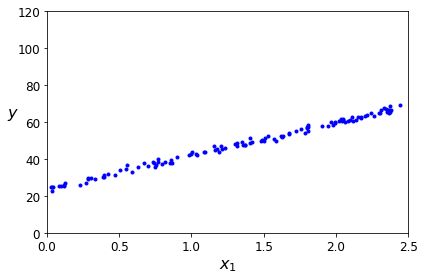

In [2]:
X = 2.5 * np.random.rand(120, 1)
y = 24 + 18 * X + np.random.randn(120, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.axis([0, 2.5, 0, 120])
save_fig("generated_data_plot")
plt.show()

In [3]:
X_b = np.c_[np.ones((120, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)   #Direct Normal equation that find's value of theta
                                                               #that minimize's function
theta_best

array([[24.03982965],
       [17.96835644]])

In [4]:
X_new = np.array([[0], [2.5]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[24.03982965],
       [68.96072074]])

Saving figure linear_model_predictions


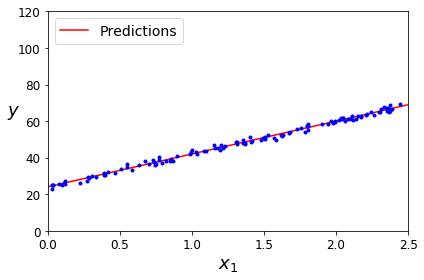

In [5]:
plt.plot(X_new, y_predict, "r-", linewidth=1.5, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2.5, 0, 120])
save_fig("linear_model_predictions")
plt.show()

# Alternative version( using Scikit)

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([24.03982965]), array([[17.96835644]]))

In [7]:
lin_reg.predict(X_new)

array([[24.03982965],
       [68.96072074]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[24.03982965],
       [17.96835644]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[24.03982965],
       [17.96835644]])

# Linear regression (Batch Gradient)

In [10]:
eta = 0.15
n_iterations = 900
m = len(X_b)
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[24.03982965],
       [17.96835644]])

In [12]:
X_new_b.dot(theta)

array([[24.03982965],
       [68.96072074]])

Saving figure gradient_descent_plot


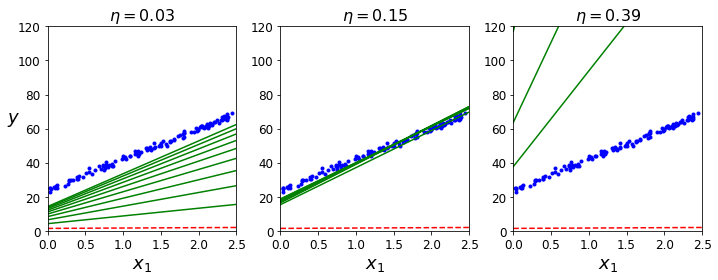

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 900
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "g-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2.5, 0, 120])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
    
np.random.seed(39)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.03)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.15, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.39)

save_fig("gradient_descent_plot")
plt.show()

# Linear regression (Stochastic gradient)

Saving figure sgd_plot


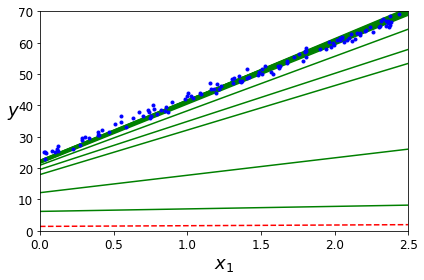

In [14]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(39)

n_epochs = 200
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "g-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2.5, 0,70])                              
save_fig("sgd_plot")                                
plt.show() 

In [15]:
theta                       

array([[24.04394393],
       [17.97750057]])

# Using Scikit

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=80, penalty=None, eta0=0.11, random_state=39)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.11, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=80,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=39, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([24.04612917]), array([17.97581397]))

# Linear regression (Mini Batch)

In [18]:
theta_path_mgd = []

n_iterations = 200
minibatch_size = 22

np.random.seed(39)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):                       
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [19]:
theta

array([[24.02907389],
       [17.94922048]])